In [1]:
import numpy as np
import pandas as pd
import json
import glob
import os
import pprint
from wordcloud import WordCloud
import joblib

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from IPython.display import HTML, display

### Data Cleansing

In [2]:
data_path = 'datasets'

In [3]:
filenames = glob.glob(f'{data_path}/**/*.json', recursive=True)

In [4]:
files = []
for f in filenames:
    files.append(json.load(open(f,'rb')))

In [5]:
pprint.pprint(files[0])

{'abstract': [{'cite_spans': [],
               'ref_spans': [],
               'section': 'Abstract',
               'text': 'word count: 194 22 Text word count: 5168 23 24 25 '
                       'author/funder. All rights reserved. No reuse allowed '
                       'without permission. Abstract 27 The positive stranded '
                       'RNA genomes of picornaviruses comprise a single large '
                       'open reading 28 frame flanked by 5′ and 3′ '
                       'untranslated regions (UTRs). Foot-and-mouth disease '
                       'virus (FMDV) 29 has an unusually large 5′ UTR (1.3 kb) '
                       'containing five structural domains. These include the '
                       '30 internal ribosome entry site (IRES), which '
                       'facilitates initiation of translation, and the '
                       'cis-acting 31 replication element (cre). Less well '
                       'characterised structures are

                                'start': 187,
                                'text': '303'}],
                'ref_spans': [],
                'section': '301',
                'text': 'NMIA reactivity for the interacting nucleotides in '
                        'the stem-loops with downstream residues of 302 PK 1, '
                        '2 and 3 again largely agreed with the predicted '
                        'structure, although the SHAPE data 303 suggests that '
                        'there might be fewer interactions than previously '
                        'predicted. However, differences 304 here could be due '
                        'to heterogeneity in the formation of PKs in this '
                        'experiment. The evidence 305 for loop-downstream '
                        'interaction was weaker for PK4. The copyright holder '
                        'for this preprint (which was not peer-reviewed) is '
                        'the . https://doi.org/10.1101/20

                                      'functional 494 requirement for multiple '
                                      'RNA conformations may explain the '
                                      'relatively weak interactions 495 '
                                      'between nucleotides involved in '
                                      'stabilising the PK motif as observed by '
                                      'SHAPE analysis or 496 by structural '
                                      'prediction.',
                              'type': 'figure'},
                 'FIGREF43': {'latex': None,
                              'text': 'was supported by funding from the '
                                      'Biotechnology and Biological Sciences '
                                      'Research 503 Council (BBSRC) of the '
                                      'United Kingdom (research grant '
                                      'BB/K003801/1). Additionally, the 504 '
           

Extract all the .json files from the folder containing 9000 papers and load into a dataframe

In [6]:
def format_abstract(abstract):
    abstract_list = [a['text'] for a in abstract]
    abstract_str = " ".join(abstract_list)
    return abstract_str

To format the body text, it would make sense to add newlines after each 

In [7]:
def format_body(body):
    body_list = [(b['section'], b['text']) for b in body]
    #create a dictionary body_sections containing the section as key and string for the relevant text.
    body_sections = {b['section']:"" for b in body}
    for section, text in body_list:
        body_sections[section]+=text
        
    body_text = ""
    for section, text in body_sections.items():
        body_text+=section
        body_text+='\n\n'
        body_text+=text
        body_text+='\n\n'
    return body_text

In [8]:
#maybe take this away and just take values from the metadata df
def format_authors(authors):
    names = []
    for author in authors:
        if author['middle']:
            names.append(" ".join([author['first']," ".join(author['middle']),author['last']]))
        else:
            names.append(" ".join([author['first'],author['last']]))
    return "; ".join(names)       


In [9]:
col_names = [
    'paper_id', 
    'title', 
    'authors',
    'abstract', 
    'body',
    'source'
]

files_clean = []
for i, file in enumerate(files):
    cols = [
        file['paper_id'],
        file['metadata']['title'],
        "",
       # format_authors(file['metadata']['authors']),
        format_abstract(file['abstract']),
        format_body(file['body_text']),
        filenames[i].split("\\")[1]
    ]
    files_clean.append(cols)
    
papers_df = pd.DataFrame(files_clean,columns=col_names,dtype="string")

In [10]:
papers_df.head(10)

,paper_id,title,authors,abstract,body,source
0,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to ...",biorxiv_medrxiv
1,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,,,Introduction The 2019-nCoV epidemic has sprea...,biorxiv_medrxiv
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...",,Infectious bronchitis (IB) causes significant ...,"Introduction Infectious bronchitis (IB), whic...",biorxiv_medrxiv
3,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,,Background: A novel coronavirus (2019-nCoV) em...,"Introduction In December 2019, a cluster of p...",biorxiv_medrxiv
4,01d162d7fae6aaba8e6e60e563ef4c2fca7b0e18,"TWIRLS, an automated topic-wise inference meth...",,Faced with the current large-scale public heal...,Introduction The sudden outbreak of the new c...,biorxiv_medrxiv
5,01e3b313e78a352593be2ff64927192af66619b5,Title: Viruses are a dominant driver of protei...,,Viruses interact with hundreds to thousands of...,The copyright holder for this preprint (whic...,biorxiv_medrxiv
6,02201e4601ab0eb70b6c26480cf2bfeae2625193,The impact of regular school closure on season...,,School closure is often considered as an optio...,they affect seasonal influenza dynamics. The...,biorxiv_medrxiv
7,0255ea4b2f26a51a3bfa3bd8f3e1978c82c976d5,Carbon Nanocarriers Deliver siRNA to Intact Pl...,,Post-transcriptional gene silencing (PTGS) is ...,INTRODUCTION siRNA without relying on plant t...,biorxiv_medrxiv
8,029c1c588047f1d612a219ee15494d2d19ff7439,Protective Population Behavior Change in Outbr...,,,"estimation is complicated, however, by effor...",biorxiv_medrxiv
9,03ce432f27c7df6af22b92245a614db2ecb5de5f,A hidden gene in astroviruses encodes a cell-p...,,Human astroviruses are small nonenveloped viru...,INTRODUCTION Humans astroviruses (HAstVs) bel...,biorxiv_medrxiv


In [11]:
metadata = pd.read_csv('all_sources_metadata_2020-03-13.csv')
metadata.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455.0,cc-by-nc,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2.002765e+09,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3.003431e+09,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,32125453.0,cc-by-nc,NaN,2020,"Zhang, Wei",Intensive Care Med,3.006643e+09,#3242,False


Use the authors, journal, and doi fields from the metadata table as advised by Semantic Scholar. Merge on sha/paper_id.

In [12]:
all_df=pd.merge(papers_df.drop(columns=['authors']),metadata[['sha','authors','journal','doi']],left_on='paper_id',right_on='sha')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11790 entries, 0 to 11789
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   paper_id  11790 non-null  object
 1   title     11790 non-null  string
 2   abstract  11790 non-null  string
 3   body      11790 non-null  string
 4   source    11790 non-null  string
 5   sha       11790 non-null  object
 6   authors   11644 non-null  object
 7   journal   10987 non-null  object
 8   doi       11572 non-null  object
dtypes: object(5), string(4)
memory usage: 921.1+ KB


In [13]:
def get_url(doi):
    if doi.startswith("http://"):
        return doi
    elif doi.startswith("doi.org"):
        return f"http://{doi}"
    else:
        return f"http://doi.org/{doi}"
    
all_df['doi'] = all_df['doi'].fillna("").apply(get_url)
all_df['authors'].fillna("")
all_df['journal'].fillna("")

0                         
1                         
2                         
3                         
4                         
               ...        
11785         Open Virol J
11786            J Exp Med
11787          J Cell Biol
11788    Nucleic Acids Res
11789              DNA Res
Name: journal, Length: 11790, dtype: object

In [14]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11790 entries, 0 to 11789
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   paper_id  11790 non-null  object
 1   title     11790 non-null  string
 2   abstract  11790 non-null  string
 3   body      11790 non-null  string
 4   source    11790 non-null  string
 5   sha       11790 non-null  object
 6   authors   11644 non-null  object
 7   journal   10987 non-null  object
 8   doi       11790 non-null  object
dtypes: object(5), string(4)
memory usage: 921.1+ KB


In [15]:
print(all_df[all_df['abstract']==''].shape)
print(all_df[all_df['body']==''].shape)

(1525, 9)
(0, 9)


Looks like some articles have no abstract, but at least all are filled with some text in the body.

In [16]:
print(all_df.iloc[11784]['body'])

INTRODUCTION

Over the past few decades, the world has witnessed outbreaks of myriad RNA viruses, including West Nile virus, severe acute respiratory syndrome coronavirus, Chikungunya virus, Ebola virus, Zika virus, and, most recently, the poliovirus (PV)-related viruses: enterovirus D68 (EV-D68) and enterovirus A71 (EV-A71) (1) (2) (3) (4) (5) (6) . Unfortunately, viral emergence has outpaced the discovery and development of compounds capable of treating these pathogens. Because sporadic outbreaks come, go, and may never come again, development of broad-spectrum therapeutics exhibiting high barriers to resistance would have the greatest value. Unbiased screening of chemical libraries for antiviral agents using cell-based assays has no problem identifying active compounds of high potency. However, identifying the target and predicting the likelihood for evolution of resistance generally take years of effort following compound discovery.As a part of a study evaluating PV infection dynam

In [17]:
# all_df.loc[test.duplicated('body',keep=False)].groupby('body').describe()
all_df.loc[all_df.duplicated('body',keep=False)]

,paper_id,title,abstract,body,source,sha,authors,journal,doi
855,018269476cd191365d6b8bed046078aea07c8c01,A mathematical model for simulating the phase-...,Background: As reported by the World Health Or...,"Background On 31 December 2019, the World Hea...",comm_use_subset,018269476cd191365d6b8bed046078aea07c8c01,"Yin, Tian-Mu Chen; Jia, Rui; Qiu-Peng, Wang; Z...",Infectious Diseases of Poverty,http://doi.org/10.1186/s40249-020-00640-3
856,018269476cd191365d6b8bed046078aea07c8c01,A mathematical model for simulating the phase-...,Background: As reported by the World Health Or...,"Background On 31 December 2019, the World Hea...",comm_use_subset,018269476cd191365d6b8bed046078aea07c8c01,"['Chen, Tian-Mu', 'Rui, Jia', 'Wang, Qiu-Peng'...",Infect Dis Poverty,http://dx.doi.org/10.1186/s40249-020-00640-3
1165,09e25e413faba97b87efc701d1ab8d2a18386efb,Rapid communication Effectiveness of airport s...,,We evaluated effectiveness of thermal passen...,comm_use_subset,09e25e413faba97b87efc701d1ab8d2a18386efb,"['Quilty, Billy J', 'Clifford, Sam', None, 'Fl...",Euro Surveill,http://dx.doi.org/10.2807/1560-7917.ES.2020.25...
1313,0eb44c0cc59184754a0a2cd8ee3c8b2302a8927c,,The ongoing outbreak of the recently emerged n...,Introduction According to the World Health Or...,comm_use_subset,0eb44c0cc59184754a0a2cd8ee3c8b2302a8927c,"Corman, V. M.; Landt, O.; Kaiser, M.; Molenkam...",Euro surveillance : bulletin Europeen sur les ...,http://doi.org/10.2807/1560-7917.ES.2020.25.3....
2210,290c2714886f1aaa00c374d3315381b0f0aa8033,,,Introduction The Middle East respiratory synd...,comm_use_subset,290c2714886f1aaa00c374d3315381b0f0aa8033,"['Abbad, Anass', 'Perera, Ranawaka APM', 'Anga...",Euro Surveill,http://dx.doi.org/10.2807/1560-7917.ES.2019.24...
2561,3339f4bb346bfa3070ae5fc7dc745ef051535b0e,Coronavirus Cell Entry Occurs through the Endo...,Enveloped viruses need to fuse with a host cel...,Introduction To achieve successful infection ...,comm_use_subset,3339f4bb346bfa3070ae5fc7dc745ef051535b0e,"['Burkard, Christine', 'Verheije, Monique H.',...",PLoS Pathog,http://dx.doi.org/10.1371/journal.ppat.1004502
2562,3339f4bb346bfa3070ae5fc7dc745ef051535b0e,Coronavirus Cell Entry Occurs through the Endo...,Enveloped viruses need to fuse with a host cel...,Introduction To achieve successful infection ...,comm_use_subset,3339f4bb346bfa3070ae5fc7dc745ef051535b0e,NaN,PLoS Pathog,http://dx.doi.org/10.1371/journal.ppat.1004709
2753,37e17a2bab698f8850dc89f7689eda93502821fb,,,A novel coronavirus (severe acute respirator...,comm_use_subset,37e17a2bab698f8850dc89f7689eda93502821fb,"['Bernard Stoecklin, Sibylle', 'Rolland, Patri...",Euro Surveill,http://dx.doi.org/10.2807/1560-7917.ES.2020.25...
3341,489040d34aa5dc8e6eba3d4e9d3d48f0bcc6061f,Open Peer Review Therapeutic strategies in an ...,A novel coronavirus (2019-nCoV) originating in...,Amendments from Version 1 Introduction A myst...,comm_use_subset,489040d34aa5dc8e6eba3d4e9d3d48f0bcc6061f,"Kruse, Robert L.",F1000Research,http://doi.org/10.12688/f1000research.22211.2
3385,4a077b9696d19b7d7fa3e71560b7fd5f414a4d19,Correspondence: Jantien A Backer (jantien.back...,A novel coronavirus (2019-nCoV) is causing an ...,"Early January 2020, a novel coronavirus (201...",comm_use_subset,4a077b9696d19b7d7fa3e71560b7fd5f414a4d19,"Backer, Jantien A; Klinkenberg, Don; Wallinga,...",Eurosurveillance,http://doi.org/10.2807/1560-7917.ES.2020.25.5....


In [18]:
all_df.drop_duplicates('body',inplace=True)
all_df = all_df.reset_index(drop=True)

In [19]:
all_df.groupby('source').count()

,paper_id,title,abstract,body,sha,authors,journal,doi
source,,,,,,,,
biorxiv_medrxiv,803,803,803,803,803,794,0,803
comm_use_subset,8992,8992,8992,8992,8992,8965,8992,8992
noncomm_use_subset,1971,1971,1971,1971,1971,1862,1971,1971


In [20]:
import scispacy
import spacy

In [21]:
nlp = spacy.load('en_core_sci_md')

In [22]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
text = all_df['body'][3]
doc = nlp(text)

In [ ]:
#spacy.displacy.render(doc, style='ent',jupyter=True)

In [24]:
def spacy_tokenizer(sentence):
    return [word.lemma_ for word in nlp(sentence) if not (word.like_num or word.is_stop or word.is_punct or word.is_space or len(word)==1)] # remove numbers, pumct, spaces, stop words

# print(doc[2].text.lower())
# for token in doc:
# #     print(token.text, token.has_vector, token.vector_norm, token.is_oov)
#     print(token.text,token.is_punct)

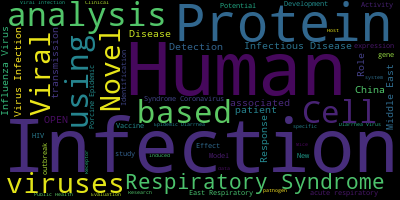

In [25]:
title_str = " ".join(list(all_df['title'].values))
wordcloud = WordCloud(max_words=3000)#, contour_width=3)#, contour_color='steelblue')
#Generate word cloud
wordcloud.generate(title_str)
#Visualize the word cloud
wordcloud.to_image()

Looks like the most frequently occurring words in paper titles include: infection; human; protein; analysis; viral; novel; cell

### Topic Modeling
My hope is to identify meaningful clusters of COVID-19 papers and uncover key themes throughout the thousands of articles.

In [26]:
from tqdm import tqdm

In [27]:
#Define a list of custom stop words to be removed in preprocessing
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al','al.','author', 'figure', 
    'rights', 'reserved', 'biorxiv', 'pmc','fig', 'fig.']

for w in custom_stop_words:
    nlp.vocab[w].is_stop = True

# remove numbers from references, any stop words, punctuation, spaces...
def spacy_tokenizer(sentence):
    tokenized = []
    for word in nlp(sentence):
        if not (word.like_num or word.is_stop or word.is_punct or word.is_space or len(word)==1):
            tokenized.append(word.lemma_)
    return tokenized 

In [ ]:
# all_body_text = all_df['title']
all_body_text = all_df['body']

#generate document term matrices for tf and tf-idf
tf_vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, max_features=800000,stop_words='english',decode_error='ignore') 
dtm_tf = tf_vectorizer.fit_transform(tqdm(all_body_text))

tf_idf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tf_idf = tf_idf_vectorizer.fit_transform(tqdm(all_body_text))
print(dtm_tf_idf.shape)

In [29]:
# joblib.dump(tf_vectorizer, 'tf_vectorizer.joblib')
# joblib.dump(dtm_tf, 'dtm_tf.joblib')
# joblib.dump(tf_idf_vectorizer, 'tf_idf_vectorizer.joblib')
# joblib.dump(dtm_tf_idf, 'dtm_tf_idf.joblib')

tf_vectorizer = joblib.load('tf_vectorizer.joblib')
dtm_tf = joblib.load('dtm_tf.joblib')
tf_idf_vectorizer = joblib.load('tf_idf_vectorizer.joblib')
dtm_tf_idf = joblib.load('dtm_tf_idf.joblib')

In [30]:
lda_model_tf = LatentDirichletAllocation(n_components=20, max_iter=10, learning_method='online')
lda_data_tf = lda_model_tf.fit_transform(dtm_tf)
print(lda_data_tf.shape) 
lda_model_tf_idf = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online')
lda_data_tf_idf = lda_model_tf_idf.fit_transform(dtm_tf_idf)
print(lda_data_tf_idf.shape) 

(11766, 20)
(11766, 10)


In [31]:
# joblib.dump(lda_data_tf, 'lda_data_tf.joblib')
# joblib.dump(lda_data_tf_idf, 'lda_data_tf_idf.joblib')
lda_data_tf = joblib.load('lda_data_tf.joblib')
lda_data_tf_idf = joblib.load('lda_data_tf_idf.joblib')

In [32]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

tf_feat_names = tf_vectorizer.get_feature_names()
print_top_words(lda_model_tf, tf_feat_names, 10)


Topic #0: porcine epidemic analysis diarrhea strain global article tract care network

Topic #1: respiratory infection virus coronavirus syndrome novel analysis acute east middle

Topic #2: disease infectious risk surveillance ebola influenza challenge immune association datum

Topic #3: genetic supplementary pathogen saudi cytokine blood follow diversity mers-cov family

Topic #4: role molecular virus pathway hepatitis drug acid high dna mechanism

Topic #5: vaccine design multiple epidemiological year injury illness particle rhinovirus virus

Topic #6: open infection application interferon adult virus activation hiv-1 protection pulmonary

Topic #7: cell human response type bat characterization journal use entry virus

Topic #8: case study infection patient disease associate clinical outbreak child report

Topic #9: virus rna replication activity infectious bacterial assay bronchitis dengue structure

Topic #10: virus expression host gene influenza approach inhibitor effect potentia

In [33]:
tf_idf_feat_names = tf_idf_vectorizer.get_feature_names()
print_top_words(lda_model_tf_idf, tf_idf_feat_names, 10)


Topic #0: health disease emerge outbreak infectious pandemic study public china transmission

Topic #1: virus infection respiratory viral cell human coronavirus protein influenza vaccine

Topic #2: material supplementary hiv selection antimicrobial nucleic mycoplasma contribute rat acid

Topic #3: pathogen emergency care pcr respiratory primary detection saudi real-time airway

Topic #4: dna metagenomic future advance regulation pediatric database platform critical journal

Topic #5: pig structural resistance virulence healthy supplemental organization direct fibrosis antibiotic

Topic #6: highly phylogenetic diversity spatial property world old alternative parvovirus bird

Topic #7: require autophagy inflammatory use protein tumor transmembrane profiling golgi display

Topic #8: current cancer mrna liver extract intracellular inhibitory modulation ace2 non-structural

Topic #9: communication isothermal life amplification synthetic encephalomyelitis loop-mediated period order bone



Topics # 1,2,4,5,6 look quite related. Let's use a tool pyLDAvis to better visualize the topics!

In [34]:
pyLDAvis.sklearn.prepare(lda_model_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.301288 -0.028584       1        1  13.445093
11    -0.139097  0.138973       2        1   7.659244
8     -0.232537  0.197463       3        1   7.164668
7     -0.013121 -0.108433       4        1   5.916441
10    -0.045444 -0.202173       5        1   5.540249
19     0.011876  0.045105       6        1   5.425920
9     -0.030594 -0.196899       7        1   5.205448
0      0.032805  0.082836       8        1   5.175688
2     -0.087453  0.047209       9        1   5.128667
6     -0.018775 -0.065149      10        1   4.587403
13     0.095220  0.034980      11        1   4.504131
18    -0.035847 -0.192428      12        1   4.405514
4      0.047418 -0.127724      13        1   4.140382
12     0.038934  0.110013      14        1   3.578890
5      0.087192 -0.015540      15        1   3.393731
15     0.116532  0.060597      16        1   3.040058
14     0.087529  0.068836      17        1   3.039198
17     0.137751  0.051658      18        1   2.949619
3      0.116054  0.049748      19        1   2.860520
16     0.132844  0.049515      20        1   2.839138, topic_info=              Term         Freq        Total Category  logprob  loglift
15134        viral   687.000000   687.000000  Default  30.0000  30.0000
2531          cell   837.000000   837.000000  Default  29.0000  29.0000
15177        virus  2351.000000  2351.000000  Default  28.0000  28.0000
4110       disease   910.000000   910.000000  Default  27.0000  27.0000
12284  respiratory  1145.000000  1145.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
4857     equipment    11.830955    12.661726  Topic20  -5.6316   3.4938
14810     underlie    11.326897    12.157669  Topic20  -5.6752   3.4909
11189         pool    10.925719    11.756490  Topic20  -5.7112   3.4884
4972    evaluation   116.233393   152.821538  Topic20  -3.3468   3.2880
3981    diagnostic    45.506640    70.763291  Topic20  -4.2845   3.1202

[810 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
238        1  0.504629   2019-ncov
238       14  0.487228   2019-ncov
525       16  0.923969  accelerate
530        1  0.029186      access
530        2  0.369686      access
...      ...       ...         ...
15591     16  0.948698    zoonosis
15592      4  0.987924    zoonotic
15918     18  0.946011       ‫بني‬
16091     18  0.973180        ‫في‬
16176     18  0.982333        ‫من‬

[899 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 12, 9, 8, 11, 20, 10, 1, 3, 7, 14, 19, 5, 13, 6, 16, 15, 18, 4, 17])

In [35]:
pyLDAvis.sklearn.prepare(lda_model_tf_idf, dtm_tf_idf, tf_idf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.336983  0.100950       1        1  39.003333
0      0.109416 -0.245359       2        1  13.013013
3      0.011852  0.024070       3        1   9.439282
4     -0.054573  0.035610       4        1   6.621655
7     -0.060017  0.034447       5        1   6.509139
2     -0.067797  0.018692       6        1   5.479316
5     -0.073166  0.005949       7        1   5.418906
6     -0.070585  0.010307       8        1   5.318291
8     -0.068375  0.008502       9        1   4.864954
9     -0.063737  0.006831      10        1   4.332112, topic_info=                Term        Freq       Total Category  logprob  loglift
15177          virus  246.000000  246.000000  Default  30.0000  30.0000
6250          health   76.000000   76.000000  Default  29.0000  29.0000
4110         disease  126.000000  126.000000  Default  28.0000  28.0000
12284    respiratory  150.000000  150.000000  Default  27.0000  27.0000
4616          emerge   42.000000   42.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
1007   amplification    7.511968   14.771874  Topic10  -5.2596   2.4629
5455            form    3.219429    5.585410  Topic10  -6.1069   2.5882
11909          rapid    3.999958   26.494803  Topic10  -5.8898   1.2485
14456  transcription    2.689154   12.264643  Topic10  -6.2869   1.6216
12351        reverse    2.610342   11.951039  Topic10  -6.3166   1.6178

[435 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
525        9  0.919090  accelerate
553        9  0.936070        ace2
574        1  0.668715        acid
574        6  0.275353        acid
574        7  0.039336        acid
...      ...       ...         ...
15196      4  0.968821  virus-host
15378      3  0.930200        west
15443      8  0.983466       world
15591      8  0.954663    zoonosis
15592      2  0.983861    zoonotic

[536 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 5, 8, 3, 6, 7, 9, 10])

We can generate a topic distribution over which each article will be assigned.

In [36]:
topic_dist = pd.DataFrame(lda_model_tf.transform(dtm_tf))

In [37]:
topic_dist.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.003846,0.558457,0.117766,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846,0.258392,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846
1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.841667,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0.003846,0.311125,0.003846,0.003846,0.003846,0.240901,0.003846,0.083865,0.003846,0.302571,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846
3,0.164404,0.163371,0.173911,0.003846,0.003846,0.003846,0.084117,0.003846,0.160785,0.003846,0.003846,0.003846,0.199566,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846,0.003846
4,0.002632,0.192607,0.002632,0.002632,0.002632,0.002632,0.760025,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632


### Document Similarity
Use the Jensen-Shannon distance to find the most similar papers to one that is specified. This metric will help us calculate the statistical proximity of one document to another, by comparing the divergence of their distributions. scipy has a built-in function to calculate this.

In [38]:
from scipy.spatial.distance import jensenshannon

def get_k_sim_docs(doc_dist, k=5):
    #takes in doc_dist, the topic distribution of one article (consisting of individual topic frequencies)
    #Returns the index of the k nearest/most similar articles (as by Jensen–Shannon divergence in topic space). 
        
    distances = topic_dist.apply(lambda x: jensenshannon(x, doc_dist), axis=1)
    k_nearest = distances.argsort()[1:k+1]
    return k_nearest

In [39]:
topic_dist.iloc[all_df[all_df.paper_id == '00cb1a95986171a256f5ef14701bd8f571221a28'].index]
# all_df[all_df.paper_id == '00cb1a95986171a256f5ef14701bd8f571221a28'].index

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
829,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.175,0.175,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.508333,0.008333,0.008333,0.008333


In [40]:
def get_sim_papers(paper_id, k=5):   
    print(all_df.loc[all_df.paper_id == paper_id,'title'].values[0])

    recommended = get_k_sim_docs(topic_dist.iloc[all_df[all_df.paper_id == paper_id].index].squeeze(), k)
    recommended = all_df.iloc[recommended]
    h = '<br/>'.join(['<a href="' + l + '" target="_blank">'+ n + '</a>' for l, n in recommended[['doi','title']].values])
    display(HTML(h))

In [41]:
get_sim_papers('0b65341c3090421acaac37ec4c93212277be55bb',7)

Comparative proteomic analysis reveals different responses in porcine lymph nodes to virulent and attenuated homologous African swine fever virus strains


In [42]:
get_sim_papers('0c27c0ddaa4761f6155838df81a88d24619720f8',7)


Title: Genome Detective Coronavirus Typing Tool for rapid identification and characterization of novel coronavirus genomes Short title: Automated tool for phylogenetic and mutational analysis of coronaviruses genomes


In [43]:
get_sim_papers(all_df['paper_id'][6])

The impact of regular school closure on seasonal influenza epidemics: a data-driven spatial transmission model for Belgium
